In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import pandas_datareader.data as reader
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

return_dataframe = pd.read_csv('Data/long_short_returns_clean.csv', index_col='date')
ls_ret = pd.DataFrame(return_dataframe['long_short_return'])
ls_ret.index = pd.to_datetime(ls_ret.index)
RF = pd.read_pickle("Data/RF.pkl")
TB = pd.read_csv('Data/GS1M.csv', parse_dates=['observation_date'], index_col='observation_date')
TB.index = TB.index.to_period('M').to_timestamp('M')
TB = TB/100


df = pd.concat([ls_ret, TB], axis=1, join='inner')
df.head()


,long_short_return,GS1M
2001-07-31,0.089026,0.0367
2001-08-31,0.076209,0.0353
2001-09-30,0.093217,0.0268
2001-10-31,-0.115257,0.0227
2001-11-30,-0.077433,0.0199


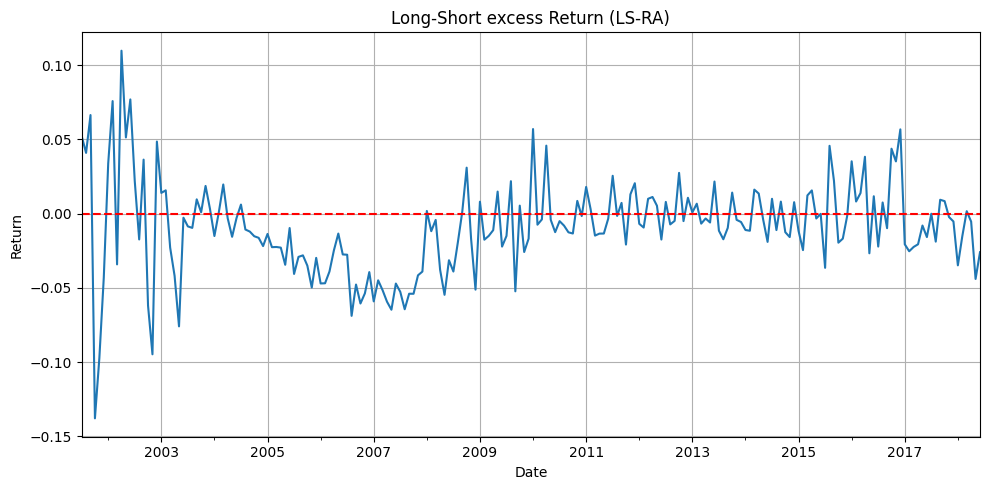

In [7]:
ls_ret_excess = df['long_short_return']-df['GS1M']
ls_ret_excess


# Plot the single time series
ls_ret_excess.plot(figsize=(10, 5), legend=False)
# Add title and axis labels
plt.title('Long-Short excess Return (LS-RA)')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Return')
plt.grid(True)
plt.tight_layout()

plt.show()


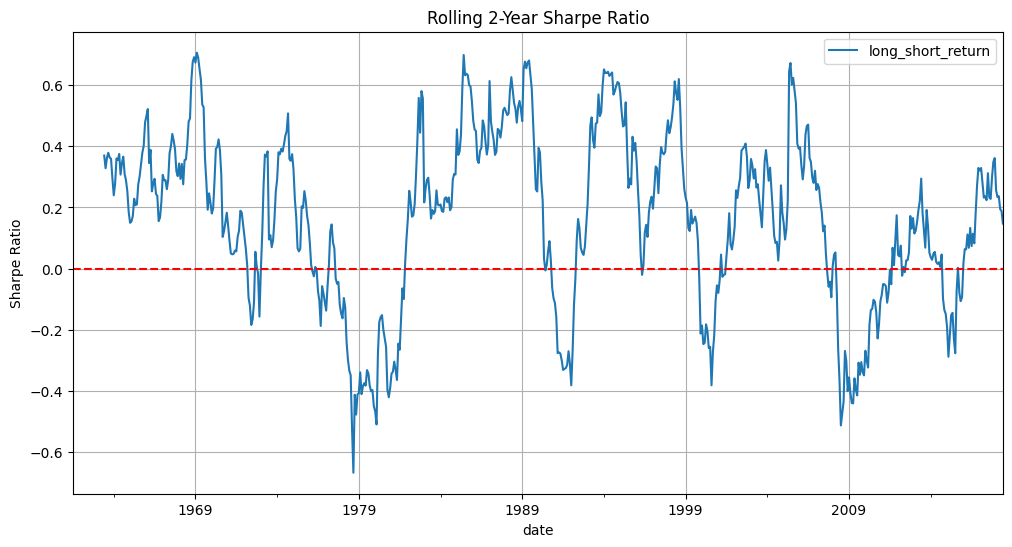

In [17]:
#Rolling average Sharpe-Ratios

rolling_mean = ls_ret.rolling(window=24).mean()
rolling_std = ls_ret.rolling(window=24).std()
rolling_sharpe = rolling_mean / rolling_std

rolling_sharpe.plot(figsize=(12, 6), title='Rolling 2-Year Sharpe Ratio')
plt.axhline(0, color='red', linestyle='--')
plt.ylabel('Sharpe Ratio')
plt.grid(True)
plt.show()

In [15]:
ls_ret

,long_short_return
date,
1961-07-31,0.002714
1961-08-31,-0.011972
1961-09-30,0.001499
1961-10-31,0.006040
1961-11-30,0.010409
...,...
2018-02-28,-0.001459
2018-03-31,0.018048
2018-04-30,0.011210


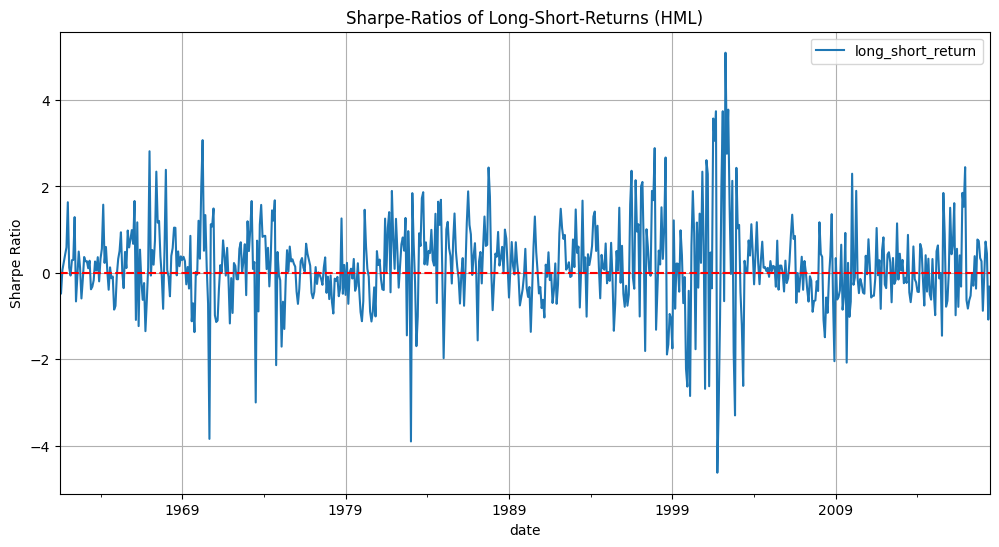

In [13]:
#Sharpe Ratios
sharpe_ratio = ls_ret/ls_ret.std()

sharpe_ratio.plot(figsize=(12, 6), title='Sharpe-Ratios of Long-Short-Returns (HML)')
plt.axhline(0, color='red', linestyle='--')
plt.ylabel('Sharpe Ratio')
plt.grid(True)
plt.show()

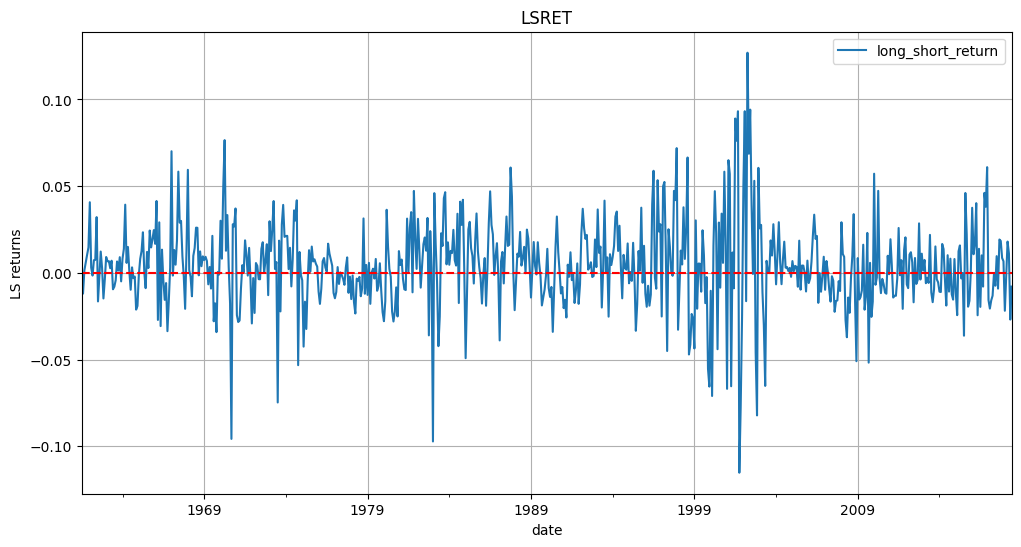

long_short_return    0.048535
dtype: float64


In [11]:
ls_ret.plot(figsize=(12, 6), title='LSRET')
plt.axhline(0, color='red', linestyle='--')
plt.ylabel('LS returns')
plt.grid(True)
plt.show()

print(ls_ret.mean() * 12)  # Annualized
